In [1]:
MODEL_1_WIDTH = 128
MODEL_1_HEIGHT = 128
MODEL_2_WIDTH = 320
MODEL_2_HEIGHT = 240
DATA_PATH = "./datasets/data/nyu2_test.csv"
MODEL_1_NAME = "model_resnet_1708450819.keras"
MODEL_2_NAME = "model_unet_1708465933.keras"
SAMPLES_COUNT = 5

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random

In [3]:
%run utils/datasets.ipynb

In [4]:
img_dm_pairs = read_csv(DATA_PATH)
labels = {i: j for i,j in img_dm_pairs}
test_paths = [i for i, j in img_dm_pairs]
print(len(test_paths))
parent_folder = DATA_PATH.rsplit('/', 1)[0]
partition = {'test': test_paths}

654


In [5]:
x_test_1 = np.empty((len(test_paths), MODEL_1_HEIGHT, MODEL_1_WIDTH, 3))
y_test_1 = np.empty((len(test_paths), MODEL_1_HEIGHT, MODEL_1_WIDTH, 1))

for i, ID in enumerate(partition['test'][:]):
    x_test_1[i, ] = preprocess_image(ID, MODEL_1_HEIGHT, MODEL_1_WIDTH, depth=False, horizontal_flip=False)
    y_test_1[i, ] = preprocess_image(labels[ID], MODEL_1_HEIGHT, MODEL_1_WIDTH, depth=True, horizontal_flip=False)

In [6]:
x_test_2 = np.empty((len(test_paths), MODEL_2_HEIGHT, MODEL_2_WIDTH, 3))
y_test_2 = np.empty((len(test_paths), MODEL_2_HEIGHT, MODEL_2_WIDTH, 1))

for i, ID in enumerate(partition['test'][:]):
    x_test_2[i, ] = preprocess_image(ID, MODEL_2_HEIGHT, MODEL_2_WIDTH, depth=False, horizontal_flip=False)
    y_test_2[i, ] = preprocess_image(labels[ID], MODEL_2_HEIGHT, MODEL_2_WIDTH, depth=True, horizontal_flip=False)

In [7]:
model_1 = tf.keras.models.load_model(MODEL_1_NAME, compile=False) # only for prediction

In [8]:
model_2 = tf.keras.models.load_model(MODEL_2_NAME, compile=False) # only for prediction

3/3 [==============================] - 1s 141ms/step


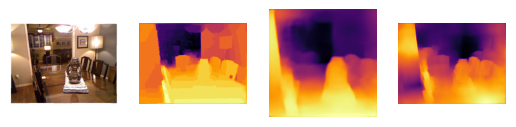

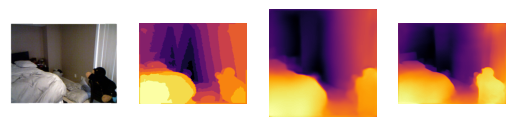

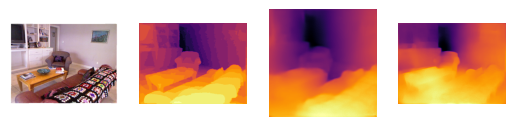

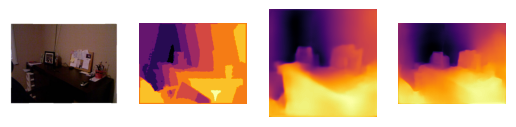

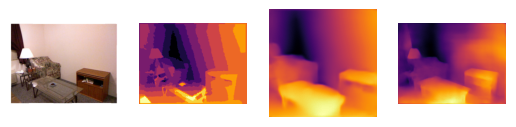

In [9]:
ixs = list(range(len(x_test_1)))
random.shuffle(ixs)
ixs = ixs[:SAMPLES_COUNT]
preds_1 = model_1.predict(x_test_1[ixs], batch_size=2)
preds_2 = model_2.predict(x_test_2[ixs], batch_size=2)
for i in range(SAMPLES_COUNT):
    path = partition['test'][ixs[i]]
    label_path = labels[path]
    pred_1 = preds_1[i]
    pred_2 = preds_2[i]

    plt.subplot(1, 4, 1)
    plt.axis("off")
    img1 = preprocess_image(path, MODEL_2_HEIGHT, MODEL_2_WIDTH, depth=False, horizontal_flip=False)
    img1 = cv2.cvtColor((img1 * 255.0).astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img1)

    plt.subplot(1, 4, 2)
    plt.axis("off")
    img = preprocess_image(label_path, MODEL_2_HEIGHT, MODEL_2_WIDTH, depth=True, horizontal_flip=False)
    plt.imshow(img, cmap=plt.get_cmap('inferno_r'))

    plt.subplot(1, 4, 3)
    plt.axis("off")
    plt.imshow(pred_1, cmap=plt.get_cmap('inferno_r'))

    plt.subplot(1, 4, 4)
    plt.axis("off")
    plt.imshow(pred_2, cmap=plt.get_cmap('inferno_r'))

    plt.show()